In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

import os
from pathlib import Path

from hypers import weight_hypers
from hypers import alpha_hypers 

from experiment import Params
from experiment import run_experiments
from experiment import load_experiments
from experiment import draw_logs
from experiment import experiments_to_df

from analysis import draw_several

### Эксперимент

In [ ]:
dir = '../results/'
file = 'experim_19.json'

seeds = np.arange(4) + 101

params = Params(series_type = "default",
                from_start = False,
                a = -40,
                b = 40,
                dim = 10,
                low = -10,
                high = 10,
                clip = (-40, 40),
                workers_num = 5,
                length = 2000,
                lower_bound = 50,
                upper_bound = 300,
                alternating=True)

different_noises = [1]
different_windows = [10]
# different_wf = ["simple_101", "const", "diverge_05"]
different_af = ["const_1500", "const_11000", "const_15000"]


interesting = set()

# for key_w in different_wf:
#     interesting.add((key_w, "start", "default"))
    
for key_a in different_af:
    interesting.add(("simple_101", "start", key_a))
    interesting.add(("const", "start", key_a))
    interesting.add(("diverge_05", "start", key_a))


experiments, df = run_experiments(dir+file, seeds, params, different_noises, different_windows, interesting)
with open(dir + Path('info_' + file).with_suffix('').as_posix(), 'w') as f:
    f.write(_ih[2])
    
# experiments, df = load_experiments(dir+file)

 76%|████████████████████████████████████████████████████████████████████▎                     | 2222/2927 [00:56<00:34, 20.16it/s]

In [ ]:
df

In [5]:
# enumerated = [(num, experiment) for num, experiment in enumerate(experiments)]
# for num, experiment in enumerated[::7]:
#     draw_logs(experiment.logs, show=["master", "ideal"], title=f"Experiment №{num},  regret = {experiment.regret:.1f}", fig_size=(12, 5))

In [6]:
experiments0, df0 = load_experiments(dir+file)

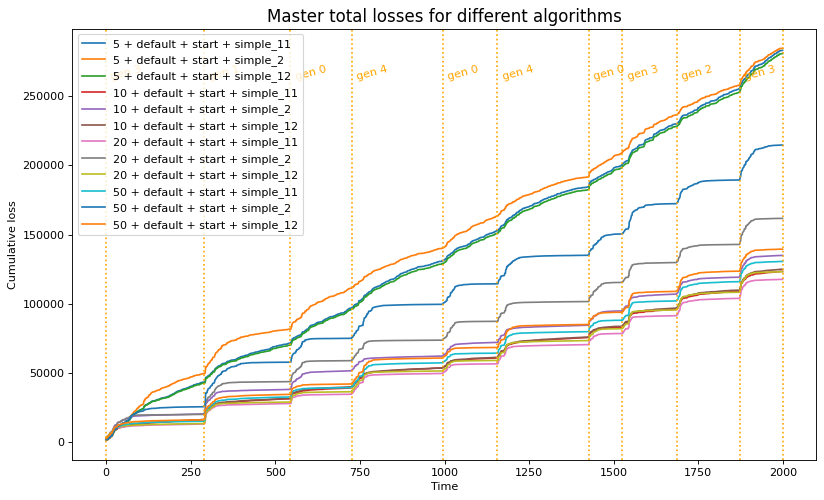

In [7]:
shift = 80 * 2
vital = merged[shift + 0: shift + 12]
anls = [experiment.logs for experiment in vital]
labels = [str(experiment.train_window) + " + " + experiment.key_a + " + " + experiment.mixing_type + " + " + experiment.key_w for experiment in vital]
colors = [None] * 16
draw_several(from_start=False, logs=anls, labels=labels, colors=colors, fig_size=(12, 7))

In [8]:
# df_w = df[df["alpha_function"] == alpha_hypers["default"].repr].iloc[:,:6]
# df_w

In [9]:
# print(df_r.to_latex(index=False, float_format="%.2f"))
# df[["noise_var", "train_window", "regret"]].groupby(["noise_var", "train_window"]).mean()